In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [8]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [9]:
train.shape

(165034, 14)

In [10]:
test.shape

(110023, 13)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [13]:
id = test['id'].values

In [14]:
id

array([165034, 165035, 165036, ..., 275054, 275055, 275056], dtype=int64)

In [15]:
train['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [16]:
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

In [17]:
train.drop(columns=['CustomerId'], inplace=True)
test.drop(columns=['CustomerId'], inplace=True)

In [18]:
train.drop(columns=['Surname'], inplace=True)
test.drop(columns=['Surname'], inplace=True)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      110023 non-null  int64  
 1   Geography        110023 non-null  object 
 2   Gender           110023 non-null  object 
 3   Age              110023 non-null  float64
 4   Tenure           110023 non-null  int64  
 5   Balance          110023 non-null  float64
 6   NumOfProducts    110023 non-null  int64  
 7   HasCrCard        110023 non-null  float64
 8   IsActiveMember   110023 non-null  float64
 9   EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 8.4+ MB


In [21]:
train['Gender'].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

In [22]:
train[['Gender', 'Exited']].groupby('Gender').mean()

,Exited
Gender,
Female,0.279687
Male,0.159055


In [23]:
train[['HasCrCard', 'Exited']].groupby('HasCrCard').mean()

,Exited
HasCrCard,
0.0,0.227429
1.0,0.206433


In [24]:
train[['IsActiveMember', 'Exited']].groupby('IsActiveMember').mean()

,Exited
IsActiveMember,
0.0,0.297086
1.0,0.125345


C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


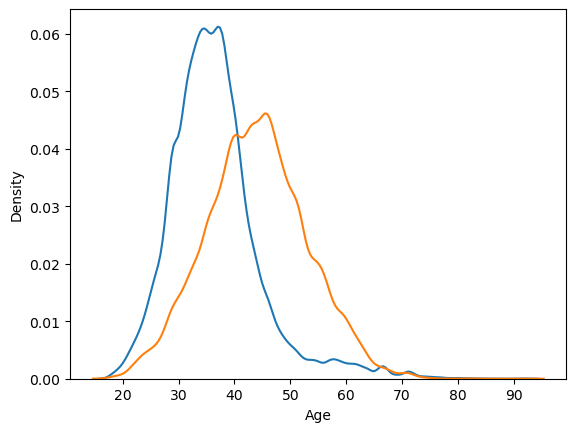

In [25]:
sns.kdeplot(train['Age'][train['Exited']==0])
sns.kdeplot(train['Age'][train['Exited']==1])
plt.show()

C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


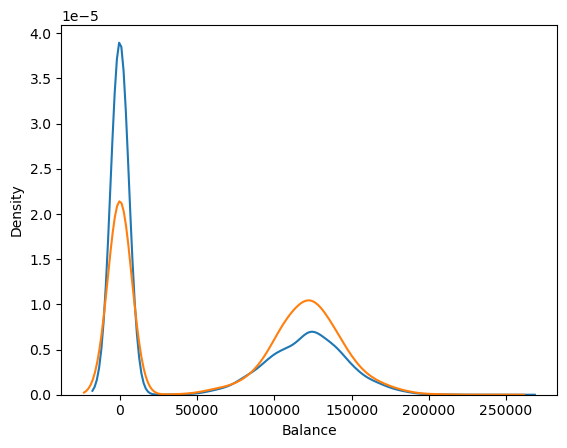

In [26]:
sns.kdeplot(train['Balance'][train['Exited']==0])
sns.kdeplot(train['Balance'][train['Exited']==1])
plt.show()

C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


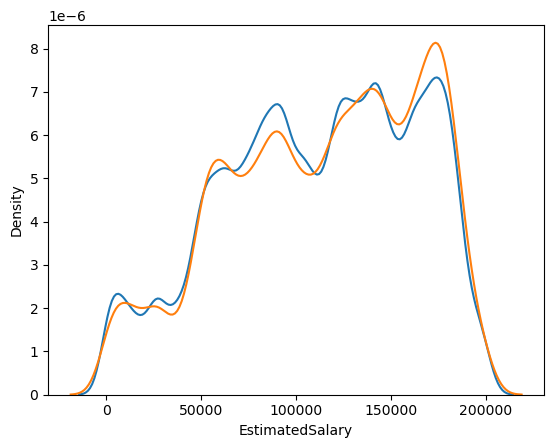

In [27]:
sns.kdeplot(train['EstimatedSalary'][train['Exited']==0])
sns.kdeplot(train['EstimatedSalary'][train['Exited']==1])
plt.show()

C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


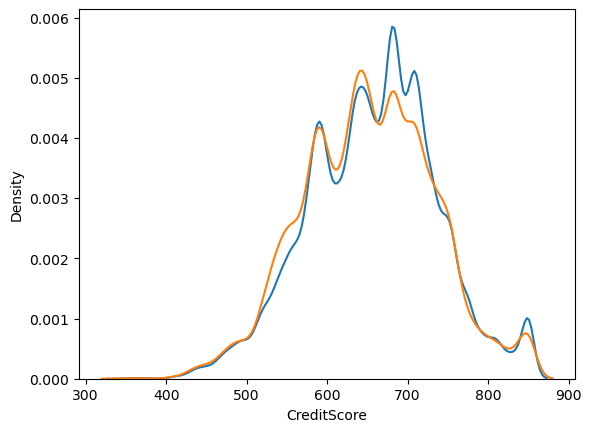

In [28]:
sns.kdeplot(train['CreditScore'][train['Exited']==0])
sns.kdeplot(train['CreditScore'][train['Exited']==1])
plt.show()

In [29]:
train[['Tenure', 'Exited']].groupby('Tenure').mean()

,Exited
Tenure,
0,0.254843
1,0.226134
2,0.194846
3,0.229104
4,0.226387
5,0.220060
6,0.198774
7,0.187591
8,0.197945


In [30]:
train[['Tenure', 'Exited', 'EstimatedSalary', 'Balance', 'CreditScore', 'NumOfProducts', 'Age', 'HasCrCard', 'IsActiveMember']].corr()

,Tenure,Exited,EstimatedSalary,Balance,CreditScore,NumOfProducts,Age,HasCrCard,IsActiveMember
Tenure,1.000000,-0.019565,0.000971,-0.009481,0.000942,0.007335,-0.010830,0.005327,-0.005532
Exited,-0.019565,1.000000,0.018827,0.129743,-0.027383,-0.214554,0.340768,-0.022141,-0.210237
EstimatedSalary,0.000971,0.018827,1.000000,0.008586,-0.001820,-0.004285,-0.005399,0.004438,-0.008080
Balance,-0.009481,0.129743,0.008586,1.000000,0.006973,-0.361033,0.064318,-0.018584,-0.015073
CreditScore,0.000942,-0.027383,-0.001820,0.006973,1.000000,0.011361,-0.008918,-0.002828,0.014790
NumOfProducts,0.007335,-0.214554,-0.004285,-0.361033,0.011361,1.000000,-0.102195,0.005482,0.039736
Age,-0.010830,0.340768,-0.005399,0.064318,-0.008918,-0.102195,1.000000,-0.012111,0.003320
HasCrCard,0.005327,-0.022141,0.004438,-0.018584,-0.002828,0.005482,-0.012111,1.000000,-0.021034
IsActiveMember,-0.005532,-0.210237,-0.008080,-0.015073,0.014790,0.039736,0.003320,-0.021034,1.000000


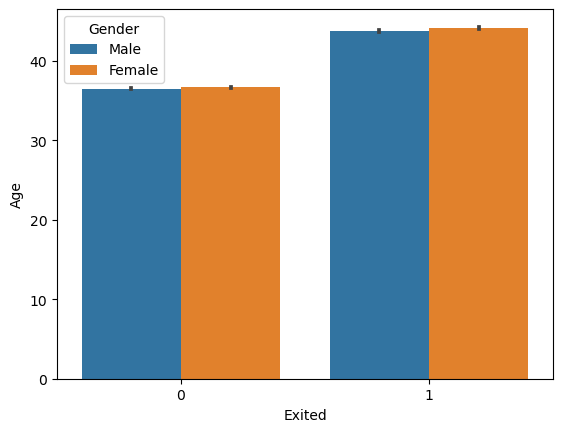

In [31]:
sns.barplot(x = train['Exited'], y = train['Age'], hue = train['Gender'])
plt.show()

In [32]:
train['Tenure'].value_counts()

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

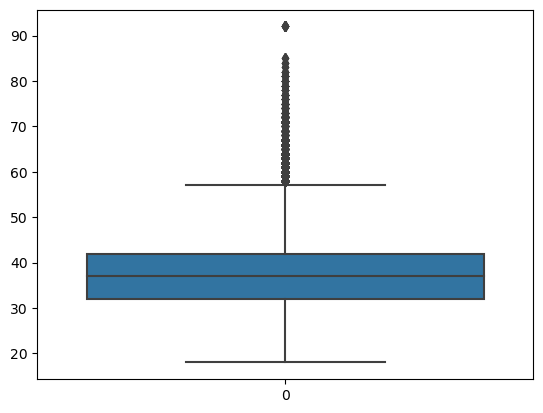

In [33]:
sns.boxplot(train['Age'])
plt.show()

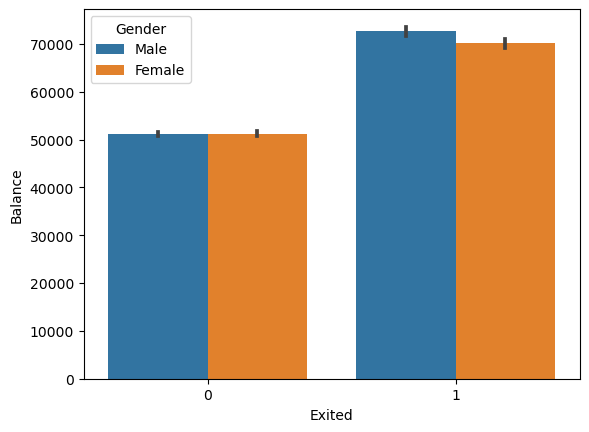

In [34]:
sns.barplot(x = train['Exited'], y = train['Balance'], hue = train['Gender'])
plt.show()

In [35]:
train['NumOfProducts'].value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

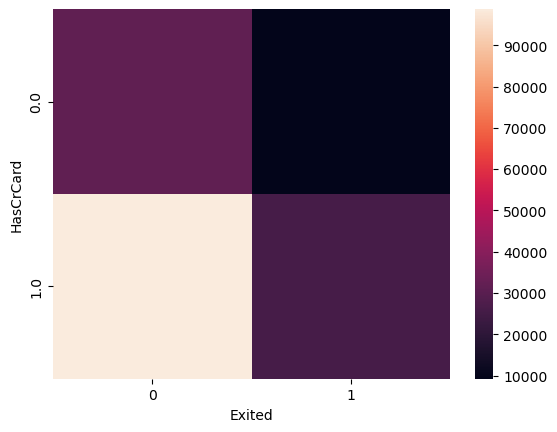

In [36]:
sns.heatmap(pd.crosstab(train['HasCrCard'], train['Exited']))
plt.show()

In [37]:
train['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [38]:
train[['Geography', 'Exited']].groupby('Geography').mean()

,Exited
Geography,
France,0.165282
Germany,0.378952
Spain,0.172176


In [39]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [40]:
train['NumOfProducts'].value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

In [41]:
train['Tenure'].value_counts()

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

In [42]:
def func(num):
    if num < 6:
        return 'Small'
    else:
        return 'Long'

In [43]:
train['Tenure'] = train['Tenure'].apply(func)

In [44]:
test['Tenure'] = test['Tenure'].apply(func)

In [45]:
#train.drop(columns=['Tenure'], inplace=True)
#test.drop(columns=['Tenure'], inplace=True)

In [46]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
149380,679,France,Male,41.0,Long,0.00,2,1.0,1.0,103560.98
164766,721,France,Male,46.0,Long,115764.32,2,1.0,0.0,102950.79
155569,551,France,Male,35.0,Small,0.00,1,1.0,0.0,155394.52
124304,743,Spain,Female,31.0,Small,57866.03,2,1.0,1.0,107428.42
108008,675,France,Male,28.0,Small,0.00,2,1.0,0.0,134110.93
...,...,...,...,...,...,...,...,...,...,...
119879,668,Germany,Male,45.0,Long,104576.80,1,1.0,0.0,113081.42
103694,751,France,Male,43.0,Long,0.00,2,1.0,0.0,88866.39
131932,753,France,Female,39.0,Long,0.00,2,1.0,0.0,167973.63
146867,685,France,Female,48.0,Small,0.00,2,1.0,1.0,24998.75


In [52]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
33042,798,France,Female,31.0,Long,102075.88,1,1.0,0.0,79577.48
36330,629,France,Male,26.0,Long,0.00,2,1.0,0.0,38190.78
59446,565,France,Male,39.0,Long,115163.32,3,1.0,0.0,69052.63
92278,653,Spain,Male,55.0,Small,70263.83,1,0.0,0.0,62347.71
146750,557,France,Female,31.0,Long,106596.29,1,1.0,0.0,91305.77
...,...,...,...,...,...,...,...,...,...,...
32661,719,France,Female,27.0,Small,0.00,2,1.0,1.0,74800.99
117592,773,France,Female,32.0,Small,0.00,1,1.0,0.0,93983.12
2194,767,Germany,Female,35.0,Long,132253.22,1,1.0,0.0,115566.57
141678,653,France,Female,33.0,Long,0.00,2,1.0,1.0,124489.88


In [53]:
X_train.shape

(132027, 10)

In [54]:
X_test.shape

(33007, 10)

In [55]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

In [56]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers = [
    ('tnf1', MinMaxScaler(), ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']),
    ('tnf2', OneHotEncoder(sparse_output=False, drop='first', dtype=int, categories='auto'), ['Gender', 'HasCrCard', 'IsActiveMember', 'Geography']),
    ('tnf3', OrdinalEncoder(categories=[['Small', 'Long']], dtype=int), ['Tenure'])
], remainder = 'passthrough')

In [57]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [58]:
Xf = test.iloc[:, :]

In [59]:
Xf_transformed = transformer.transform(Xf)

In [60]:
X_train_transformed.shape

(132027, 11)

In [61]:
X_train_transformed[0]

array([0.658     , 0.31081081, 0.        , 0.51779645, 1.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       2.        ])

In [62]:
transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1', MinMaxScaler(),
                                 ['CreditScore', 'Age', 'Balance',
                                  'EstimatedSalary']),
                                ('tnf2',
                                 OneHotEncoder(drop='first',
                                               dtype=<class 'int'>,
                                               sparse_output=False),
                                 ['Gender', 'HasCrCard', 'IsActiveMember',
                                  'Geography']),
                                ('tnf3',
                                 OrdinalEncoder(categories=[['Small', 'Long']],
                                                dtype=<class 'int'>),
                                 ['Tenure'])])>

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
#from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [101]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [102]:


# K-Nearest Neighbors
knc = KNeighborsClassifier(n_neighbors=5)

# Decision Tree
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)

# Logistic Regression
lrc = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)

# Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# AdaBoost
abc = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')

# Bagging
bc = BaggingClassifier(n_estimators=50, random_state=42)

# Extra Trees
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Gradient Boosting
gbdt = GradientBoostingClassifier(n_estimators=100, random_state=42)

# XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42)

# Naive Bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Support Vector Machines
#svc = SVC(kernel='rbf', random_state=42)
#lsvc = LinearSVC(random_state=42)

# Discriminant Analysis
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Gaussian Process
gpc = GaussianProcessClassifier(random_state=42)

# LightGBM
lgbm = LGBMClassifier(n_estimators=100, random_state=42)

# CatBoost
cbc = CatBoostClassifier(iterations=100, random_state=42)

In [103]:
# Linear models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Tree-based models
dtr = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=5)

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, 
                            min_samples_leaf=5, n_jobs=-1, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, 
                                min_samples_split=5, min_samples_leaf=5, random_state=42)

abr = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)

etr = ExtraTreesRegressor(n_estimators=100, max_depth=10, min_samples_split=5, 
                          min_samples_leaf=5, n_jobs=-1, random_state=42)

# Other models
knr = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, 
                          p=2, metric='minkowski', n_jobs=-1)

#svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

xgbr = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, 
                    min_child_weight=1, subsample=0.8, colsample_bytree=0.8, 
                    objective='reg:squarederror', n_jobs=-1, random_state=42)

lgbmr = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, 
                      num_leaves=31, min_child_samples=20, 
                      subsample=0.8, colsample_bytree=0.8, 
                      objective='regression', n_jobs=-1, random_state=42)

cbr = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, 
                        l2_leaf_reg=3, loss_function='RMSE', 
                        thread_count=-1, random_state=42)

In [112]:
clfs = {
    'KNN': knc,  # K-Nearest Neighbors
    'DT': dtc,   # Decision Tree
    'LR': lrc,   # Logistic Regression
    'RF': rfc,   # Random Forest
    'AdaBoost': abc,  # AdaBoost
    'BgC': bc,   # Bagging Classifier
    'ETC': etc,  # Extra Trees Classifier
    'GBDT': gbdt,  # Gradient Boosting Decision Tree
    'XGB': xgb,  # XGBoost
    'GNB': gnb,  # Gaussian Naive Bayes
    'MNB': mnb,  # Multinomial Naive Bayes
    'BNB': bnb,  # Bernoulli Naive Bayes
    #'LinearSVC': lsvc,  # Linear Support Vector Classifier
    'LGBM': lgbm,  # LightGBM
    'CatBoost': cbc  # CatBoost
}

In [113]:
regs = {
    'LR': lr,  # Linear Regression
    'Ridge': ridge,
    'Lasso': lasso,
    'ElasticNet': elastic,
    'DT': dtr,  # Decision Tree Regressor
    'RF': rfr,  # Random Forest Regressor
    'GB': gbr,  # Gradient Boosting Regressor
    'AdaBoost': abr,  # AdaBoost Regressor
    'ET': etr,  # Extra Trees Regressor
    'KNN': knr,  # K-Nearest Neighbors Regressor
    'XGB': xgbr,  # XGBoost Regressor
    'LGBM': lgbmr,  # LightGBM Regressor
    'CatBoost': cbr  # CatBoost Regressor
}

In [114]:
y.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [115]:
y_train

149380    0
164766    0
155569    0
124304    0
108008    0
         ..
119879    0
103694    0
131932    0
146867    0
121958    0
Name: Exited, Length: 132027, dtype: int64

In [116]:
y_test

33042     0
36330     0
59446     1
92278     0
146750    0
         ..
32661     0
117592    0
2194      0
141678    0
20040     0
Name: Exited, Length: 33007, dtype: int64

In [117]:
from sklearn.metrics import roc_auc_score

In [118]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    roc = roc_auc_score(y_test, y_pred)
    return roc

In [119]:
roc_scores1 = []
for name,clf in clfs.items():
    current_roc = train_classifier(clf, X_train_transformed,y_train,X_test_transformed,y_test)
    print("Name: ", name)
    print("ROC AUC Score: ", current_roc)
    roc_scores1.append(current_roc)

Name:  KNN
ROC AUC Score:  0.7324552189653762
Name:  DT
ROC AUC Score:  0.7346700918795048
Name:  LR
ROC AUC Score:  0.6718320368608577
Name:  RF
ROC AUC Score:  0.743360116574902
Name:  AdaBoost
ROC AUC Score:  0.7339140912997871
Name:  BgC
ROC AUC Score:  0.7377263087053786
Name:  ETC
ROC AUC Score:  0.7361255203467975
Name:  GBDT
ROC AUC Score:  0.7485423832421426
Name:  XGB
ROC AUC Score:  0.7555603745779469
Name:  GNB
ROC AUC Score:  0.6812356236484615
Name:  MNB
ROC AUC Score:  0.5084876616285761
Name:  BNB
ROC AUC Score:  0.5870810499776865
[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 11
[LightGBM] [Info] [bi

In [120]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'ROC': roc_scores1}).sort_values('ROC',ascending=False)

In [121]:
performance_df

,Algorithm,ROC
12,LGBM,0.756669
8,XGB,0.755560
13,CatBoost,0.754542
7,GBDT,0.748542
3,RF,0.743360
5,BgC,0.737726
6,ETC,0.736126
1,DT,0.734670
4,AdaBoost,0.733914
0,KNN,0.732455


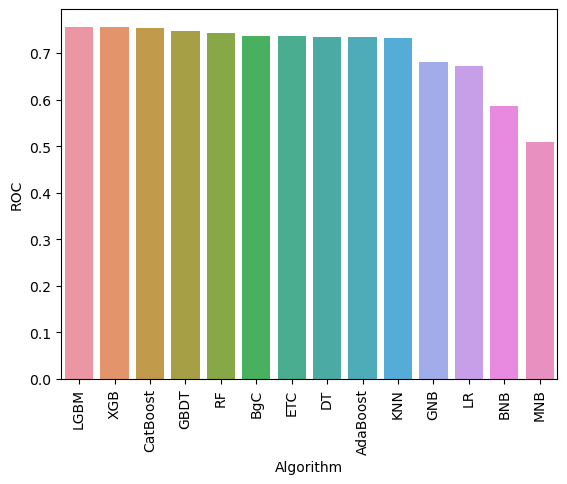

In [122]:
sns.barplot(x = performance_df['Algorithm'], y = performance_df['ROC'])
plt.xticks(rotation = 'vertical')
plt.show()

In [77]:
def train_regressor(reg,X_train,y_train,X_test,y_test):
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    roc = roc_auc_score(y_test, y_pred)
    return roc

In [124]:
roc_scores2 = []
for name,reg in regs.items():
    current_roc = train_regressor(reg, X_train_transformed,y_train,X_test_transformed,y_test)
    print("Name: ", name)
    print("ROC AUC Score: ", current_roc)
    roc_scores2.append(current_roc)

Name:  LR
ROC AUC Score:  0.8182857643668588
Name:  Ridge
ROC AUC Score:  0.8182843211436994
Name:  Lasso
ROC AUC Score:  0.5
Name:  ElasticNet
ROC AUC Score:  0.5
Name:  DT
ROC AUC Score:  0.8767993488221257
Name:  RF
ROC AUC Score:  0.8881141632015512
Name:  GB
ROC AUC Score:  0.8905395590503449
Name:  AdaBoost
ROC AUC Score:  0.8604427129813812
Name:  ET
ROC AUC Score:  0.8887775077506328
Name:  KNN
ROC AUC Score:  0.8292816291875685
Name:  XGB
ROC AUC Score:  0.89007183608782
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 11
[LightGBM] [Info] Start training from score 0.211820
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

81:	learn: 0.3141264	total: 1.82s	remaining: 400ms
82:	learn: 0.3141052	total: 1.85s	remaining: 379ms
83:	learn: 0.3141029	total: 1.89s	remaining: 361ms
84:	learn: 0.3140664	total: 1.93s	remaining: 341ms
85:	learn: 0.3140483	total: 1.97s	remaining: 320ms
86:	learn: 0.3140284	total: 2s	remaining: 299ms
87:	learn: 0.3140093	total: 2.04s	remaining: 279ms
88:	learn: 0.3139919	total: 2.06s	remaining: 255ms
89:	learn: 0.3139793	total: 2.09s	remaining: 232ms
90:	learn: 0.3139673	total: 2.1s	remaining: 208ms
91:	learn: 0.3139559	total: 2.12s	remaining: 185ms
92:	learn: 0.3139336	total: 2.14s	remaining: 161ms
93:	learn: 0.3139230	total: 2.16s	remaining: 138ms
94:	learn: 0.3139078	total: 2.18s	remaining: 115ms
95:	learn: 0.3138898	total: 2.19s	remaining: 91.5ms
96:	learn: 0.3138719	total: 2.21s	remaining: 68.5ms
97:	learn: 0.3138501	total: 2.23s	remaining: 45.6ms
98:	learn: 0.3138399	total: 2.25s	remaining: 22.8ms
99:	learn: 0.3138234	total: 2.28s	remaining: 0us
Name:  CatBoost
ROC AUC Score:  0

In [125]:
performance_df2 = pd.DataFrame({'Algorithm':regs.keys(),'ROC': roc_scores2}).sort_values('ROC',ascending=False)

In [126]:
performance_df2

,Algorithm,ROC
6,GB,0.890540
10,XGB,0.890072
11,LGBM,0.890020
12,CatBoost,0.889665
8,ET,0.888778
5,RF,0.888114
4,DT,0.876799
7,AdaBoost,0.860443
9,KNN,0.829282
0,LR,0.818286


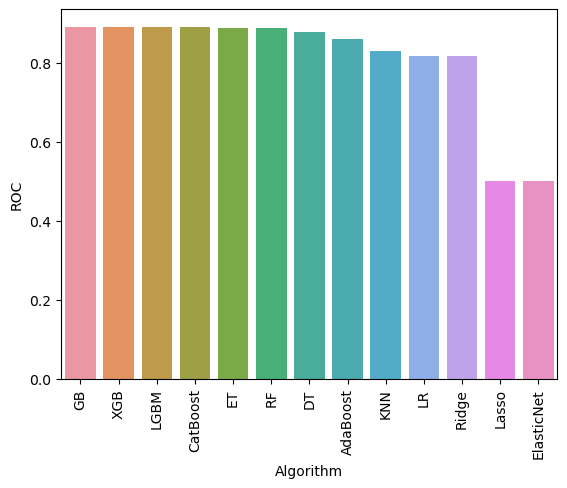

In [127]:
sns.barplot(x = performance_df2['Algorithm'], y = performance_df2['ROC'])
plt.xticks(rotation = 'vertical')
plt.show()

In [128]:
clf1 = LGBMClassifier(n_estimators=100, random_state=42)

In [184]:
clf2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, 
                                min_samples_split=5, min_samples_leaf=5, random_state=42)

In [185]:
clf1.fit(X_train_transformed,y_train)

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988


LGBMClassifier(random_state=42)

In [186]:
clf2.fit(X_train_transformed,y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                          random_state=42)

In [187]:
y_pred1=clf1.predict(X_test_transformed)

In [188]:
y_pred2=clf2.predict(X_test_transformed)

In [189]:
y_pred1.shape

(33007,)

In [190]:
y_pred2.shape

(33007,)

In [191]:
y_test.shape

(33007,)

In [192]:
roc_auc_score(y_test, y_pred1)

0.7566689769275253

In [193]:
roc_auc_score(y_test, y_pred2)

0.8905395590503449

In [194]:
yf1=clf1.predict(Xf_transformed)

In [195]:
yf2=clf2.predict(Xf_transformed)

In [196]:
yf1.shape

(110023,)

In [197]:
yf2.shape

(110023,)

In [206]:
submission1=pd.DataFrame()
submission2=pd.DataFrame()

In [207]:
submission1['id']=id
submission1['Exited']=yf1
submission2['id']=id
submission2['Exited']=yf2

In [208]:
submission1.sample(5)

,id,Exited
5232,170266,0
83844,248878,0
56889,221923,0
95270,260304,0
60930,225964,0


In [209]:
submission2.sample(5)

,id,Exited
54866,219900,0.050381
51351,216385,0.006650
35254,200288,0.199543
24481,189515,0.000768
22124,187158,0.021458


In [210]:
submission1['Exited'].value_counts()

Exited
0    92583
1    17440
Name: count, dtype: int64

In [211]:
submission2['Exited'].value_counts()

Exited
 0.020320    63
-0.002045    62
 0.021659    53
 0.007074    53
 0.012194    51
             ..
 0.908731     1
 0.241652     1
 0.412282     1
 0.062846     1
 0.186791     1
Name: count, Length: 95317, dtype: int64

In [212]:
submission1.to_csv('submission1.csv', index=False)

In [213]:
submission2.to_csv('submission2.csv', index=False)